In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

tqdm.pandas()

%matplotlib inline

SEED = 42

NUM_FEATURES = 5000
NUM_CLASSES = 3993

features = pd.read_csv("../data/expanded/train_features.csv", names=range(NUM_FEATURES))
labels = pd.read_csv("../data/expanded/train_labels.csv", names=range(NUM_CLASSES))

In [2]:
from sklearn.preprocessing import StandardScaler

# Centering the data (by just subtracting the mean)
scaler = StandardScaler(with_std=False)
features_centered = scaler.fit_transform(features)

In [3]:
from sklearn.decomposition import PCA

# Arbitarily chosen (for now)
n_components = 2500

pca = PCA(n_components=n_components)
features_reduced = pca.fit_transform(features_centered)
features_reduced = pd.DataFrame(features_reduced)

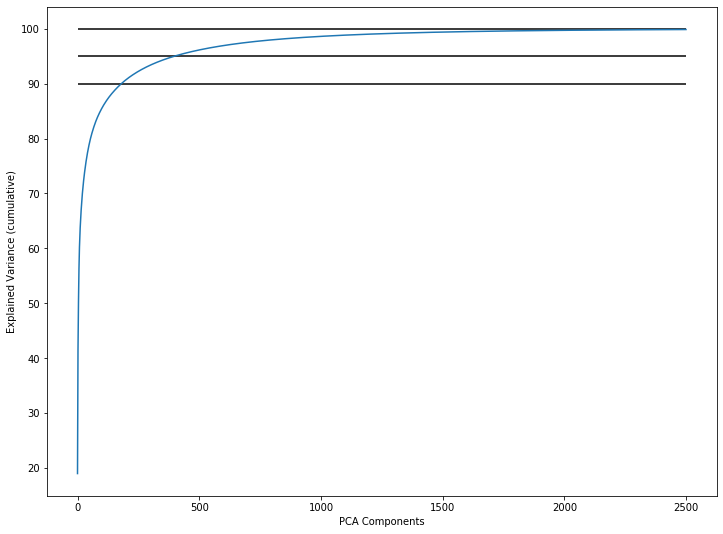

In [4]:
plt.figure(figsize=(12, 9))
plt.plot(pca.explained_variance_ratio_.cumsum() * 100)
plt.hlines([90, 95, 100], 0, n_components)
plt.xlabel("PCA Components")
plt.ylabel("Explained Variance (cumulative)")
plt.show()